# IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
from sklearn.tree import ExtraTreeRegressor
etr = ExtraTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
from sklearn.ensemble import ExtraTreesRegressor
eetr = ExtraTreesRegressor()
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from xgboost import XGBRegressor
xg = XGBRegressor()

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Date and Time,Air Pollution Index,Humidity,Wind Speed,Wind Direction,Visibility (miles),Dew Point,Temperature,Rain_p_h,Snow_p_h,Clouds_all,Weather Type,Weather Description,Traffic
0,02-10-2012 09:00,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,02-10-2012 10:00,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,02-10-2012 11:00,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,02-10-2012 12:00,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,02-10-2012 13:00,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


# DATA DESCRIPTION

In [3]:
data.describe()

,Air Pollution Index,Humidity,Wind Speed,Wind Direction,Visibility (miles),Dew Point,Temperature,Rain_p_h,Snow_p_h,Clouds_all,Traffic
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 14 columns):
Date and Time          33750 non-null object
Air Pollution Index    33750 non-null int64
Humidity               33750 non-null int64
Wind Speed             33750 non-null int64
Wind Direction         33750 non-null int64
Visibility (miles)     33750 non-null int64
Dew Point              33750 non-null int64
Temperature            33750 non-null float64
Rain_p_h               33750 non-null float64
Snow_p_h               33750 non-null float64
Clouds_all             33750 non-null int64
Weather Type           33750 non-null object
Weather Description    33750 non-null object
Traffic                33750 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 3.6+ MB


# NO NULL VALUES IN THE DATA SET.

# EDA , VISUALIZATION'S AND OUTLIER TREATMENT.

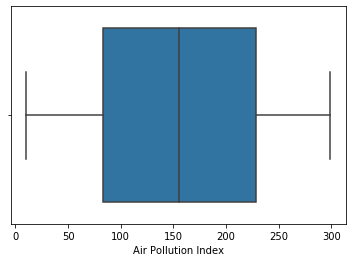

In [5]:
sns.boxplot(data['Air Pollution Index'])
plt.show()

NO OUTLIERS IN THE DATA, WE CAN LOOK AT THE DISTRIBUTION.

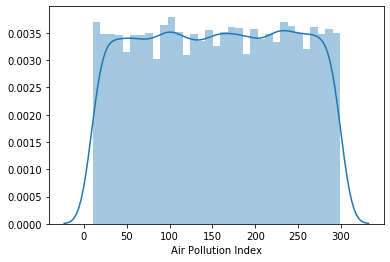

In [6]:
sns.distplot((data['Air Pollution Index']))
plt.show()

AS THE DISTRIBUTION IS PLATYKURTIC WE WILL USE THE LOG TRANSFORMATION TO MAKE IT A LITTLE BETTER.

In [7]:
data['Air Pollution Index'] = np.log(data['Air Pollution Index'])

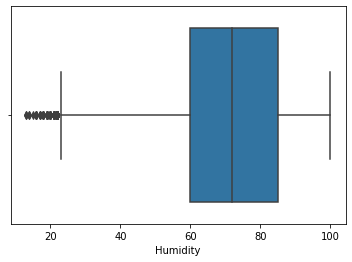

In [8]:
sns.boxplot(data['Humidity'])
plt.show()

WE WILL REMOVE THE OUTLIERS IN THE HUMIDITY COLUMN.

In [9]:
Q1 = np.quantile(data['Humidity'],0.25)
Q3 = np.quantile(data['Humidity'],0.75)
IQR = Q3-Q1
UL = Q3 + 1.5* IQR
LL = Q1 - 1.5* IQR

In [10]:
data = data[(data['Humidity']>LL) & (data['Humidity']<UL)]

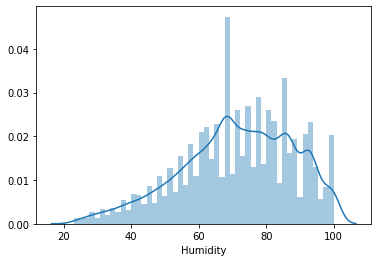

In [11]:
sns.distplot(data['Humidity'])
plt.show()

IT IS NOT A TRUE NORMAL DISTRIBUTION , BUT IT IS ALMOST SO WE WILL JUST STICK WITH THE DISTRIBUTION.

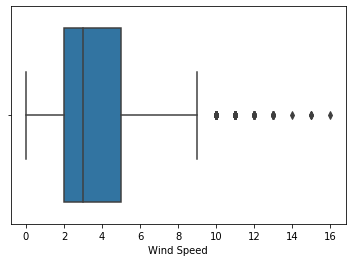

In [12]:
sns.boxplot(data['Wind Speed'])
plt.show()

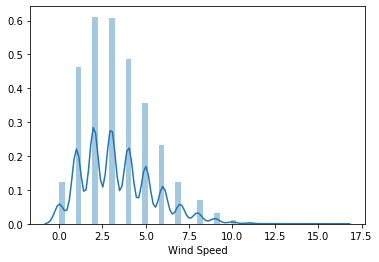

In [13]:
sns.distplot(data['Wind Speed'])
plt.show()

WE WILL CONSIDER WIND SPEED AS CATEGORICAL DATA, AS MOST OF THE VALUES ARE IN THE RANGE FROM 0-16

In [14]:
data['Wind Speed'].value_counts()

2     6584
3     6536
4     5224
1     4992
5     3849
6     2498
7     1333
0     1326
8      746
9      355
10     121
11      52
12      17
13      10
15       3
14       1
16       1
Name: Wind Speed, dtype: int64

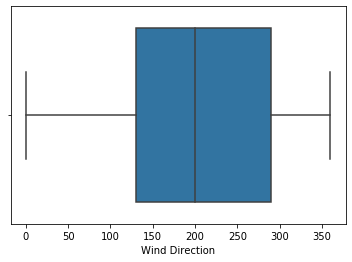

In [15]:
sns.boxplot(data['Wind Direction'])
plt.show()

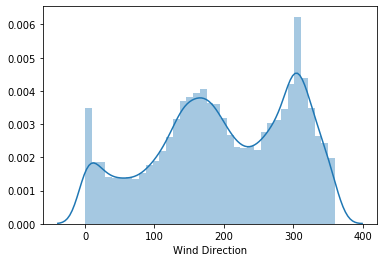

In [16]:
sns.distplot(data['Wind Direction'])
plt.show()

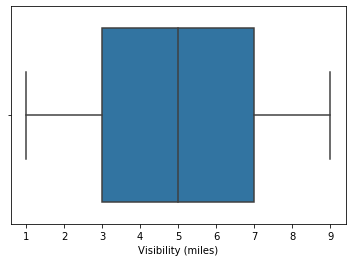

In [17]:
sns.boxplot(data['Visibility (miles)'])
plt.show()

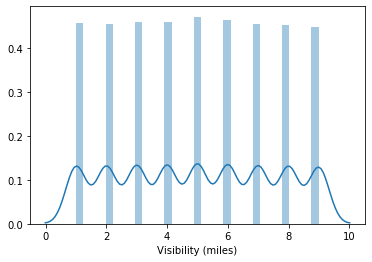

In [18]:
sns.distplot(data['Visibility (miles)'])
plt.show()

AGAIN WE WILL CONSIDER THE DATA POINTS IN THE VISIBILITY (MILES) AS CATEGORICAL. AND WE WILL DROP THE DEW POINT COLUMN AS BOTH THE DEW POINT AND THE VISIBILITY COLUMNS HAVE THE SAME VALUE.

In [19]:
data.drop('Dew Point',axis = 1,inplace = True)

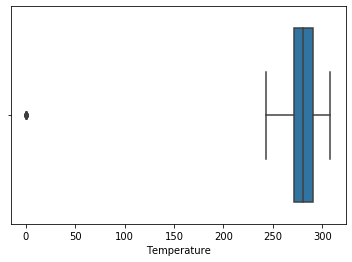

In [20]:
sns.boxplot(data['Temperature'])
plt.show()

WE WILL REMOVE THE OUTLIERS IN THE TEMPERATURE COLUMN.

In [21]:
Q1 = np.quantile(data['Temperature'],0.25)
Q3 = np.quantile(data['Temperature'],0.75)
IQR = Q3-Q1
UL = Q3 + 1.5* IQR
LL = Q1 - 1.5* IQR

In [22]:
data = data[(data['Temperature']>LL) & (data['Temperature']<UL)]

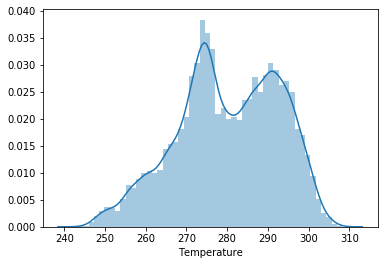

In [23]:
sns.distplot(data['Temperature'])
plt.show()

THOUGH WE HAVE A BI-MODAL PLOT, EVEN AFTER TRYING TO TRANSFORM THE DATA STILLS STAYS BI-MODAL, SO WE WILL STICK TO THE CURRENT DISTRIBUTION.

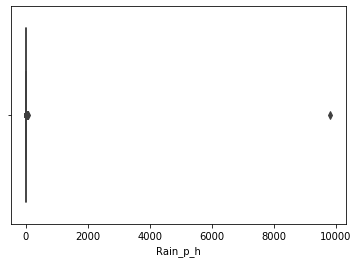

In [24]:
sns.boxplot(data['Rain_p_h'])
plt.show()

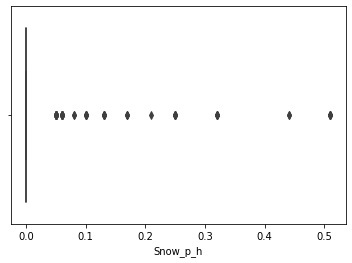

In [25]:
sns.boxplot(data['Snow_p_h'])
plt.show()

IF WE LOOK AT THE VALUE COUNTS OF EACH OF THE COLUMNS, WE CAN UNDERSTAND WHY THESE BOXPLOTS ARE IN THIS MANNER.

In [26]:
data['Snow_p_h'].value_counts()

0.00    33575
0.05       14
0.06       12
0.10        6
0.13        6
0.51        6
0.25        6
0.32        5
0.17        3
0.08        2
0.44        2
0.21        1
Name: Snow_p_h, dtype: int64

In [27]:
data['Rain_p_h'].value_counts()

0.00    30884
0.25      679
0.51      241
0.30      119
0.76       97
        ...  
3.12        1
1.53        1
2.34        1
0.92        1
2.13        1
Name: Rain_p_h, Length: 353, dtype: int64

AFTER LOOKING AT THE VALUE COUNTS MOST OF THE VALUES IN THE DATA ARE ZERO, IN WHICH CASE THE MACHINE CANT LEARN ANYTHING FROM BOTH THESE COLUMNS, SO WE WILL JUST DIS-REGARD THESE COLUMNS.

In [28]:
data.drop(['Snow_p_h','Rain_p_h'],axis = 1,inplace = True)

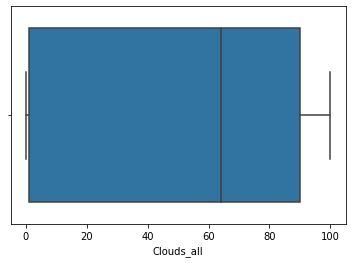

In [29]:
sns.boxplot(data['Clouds_all'])
plt.show()

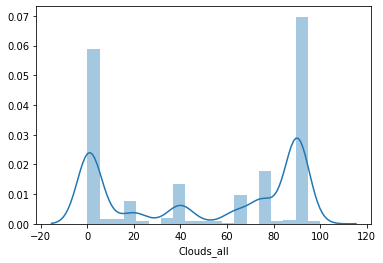

In [30]:
sns.distplot(data['Clouds_all'])
plt.show()

WE DONT REALLY UNDERSTAND WHAT THE COLUMN "CLOUDS_ALL" STANDS FOR , WE NEED SOME DOMAIN KNOWLEDGE HERE, SO WE WILL STICK WITH THE COLUMN AS OF NOW.

PLEASE ALSO SEE THE TABLEAU FILE FOR SOME GOOD INSIGHTS ABOUT THE OTHER COLUMNS LIKE AIR POLLUTION INDEX , HUMIDITY,WIND DIRECTION, WEATHER DESCRIPTION AND WIND SPEED.

In [31]:
data.drop(['Air Pollution Index','Humidity','Clouds_all','Wind Direction','Weather Description'],axis = 1,inplace = True)

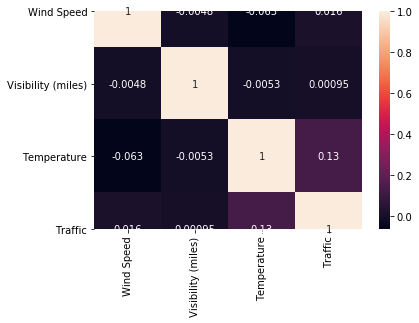

In [32]:
sns.heatmap(data.corr(),annot = True)
plt.show()

ALMOST ALL THE FEATURE'S NO CO-RELATION WITH EACH OTHER OR WITH THE TARGET, WE WONT DIS REGARD ANY FEATURES NOW BUT AFTER STATISTICAL ANALYSIS AND MODELLING WE WILL LOOK AT THE IMPORTANT FEATURES AND THEN STICK OR REMOVE THE FEATURES.

# FEATURE ENGINEERING.

WE HAVE A DATE AND TIME COLUMN, WE CAN CREATE NEW COLUMNS SUCH AS DAY , MONTH, YEAR, AND HOUR WHICH GIVES US 4 NEW COLUMNS AND WE CAN DROP THE DATE AND TIME COLUMN.

In [33]:
data['Date and Time'] = pd.to_datetime(data['Date and Time'])
data['Year'] = data['Date and Time'].dt.year
data['Month'] = data['Date and Time'].dt.month
data['Day'] = data['Date and Time'].dt.day
data['Hour'] = data['Date and Time'].dt.hour
data.drop('Date and Time',axis = 1,inplace = True)

In [34]:
data.head()

,Wind Speed,Visibility (miles),Temperature,Weather Type,Traffic,Year,Month,Day,Hour
0,2,1,288.28,Clouds,5545,2012,2,10,9
1,3,1,289.36,Clouds,4516,2012,2,10,10
2,3,2,289.58,Clouds,4767,2012,2,10,11
3,3,5,290.13,Clouds,5026,2012,2,10,12
4,3,7,291.14,Clouds,4918,2012,2,10,13


# STATISTICAL ANALYSIS.

WE WANT TO CHECK IF THERE IS ANY RELATIONSHIP BETWEEN SEASONALITY AND OUR TRAFFIC VOLUME.

In [35]:
Spring = data['Traffic'][(data['Month']>=3) & (data['Month']<6)]
summer = data['Traffic'][(data['Month']>=6) & (data['Month']<9)]
fall = data['Traffic'][(data['Month']>=9) & (data['Month']<12)]
winter = data['Traffic'][(data['Month']==12) | (data['Month']<3)]

In [36]:
f_oneway(Spring,summer,fall,winter)

F_onewayResult(statistic=19.262032227711696, pvalue=1.7885180706271804e-12)

CLEARLY THE P-VALUE IS < 0.05 SO WE WILL REJECT THE NULL HYPOTHESIS STATING THAT THERE IS A RELATIONSHIP WITH SEASONALITY AND OUR TARGET VARIABLE METRO TRAFFIC.

LET US SEE HOW THE RELATIONSHIP IS WITH EACH WEATHER TYPE AND OUR TARGET.

In [37]:
clouds = data['Traffic'][data['Weather Type'] == 'Clouds']
clear = data['Traffic'][data['Weather Type'] == 'Clear']
mist = data['Traffic'][data['Weather Type'] == 'Mist']
rain = data['Traffic'][data['Weather Type'] == 'Rain']
snow = data['Traffic'][data['Weather Type'] == 'Snow']
drizzle = data['Traffic'][data['Weather Type'] == 'Drizzle']
haze = data['Traffic'][data['Weather Type'] == 'Haze']
fog = data['Traffic'][data['Weather Type'] == 'Fog']
thunderstorm = data['Traffic'][data['Weather Type'] == 'Thunderstorm']
smoke = data['Traffic'][data['Weather Type'] == 'Smoke']
squall = data['Traffic'][data['Weather Type'] == 'Squall']

In [38]:
f_oneway(clouds,clear,mist,rain,snow,drizzle,haze,fog,thunderstorm,smoke,squall)

F_onewayResult(statistic=46.420921547726465, pvalue=8.998288681204043e-93)

Clearly P_Value < 0.05 we will reject the null hypothesis and we will say that there is a significant change in traffic w.r.t the weather type.

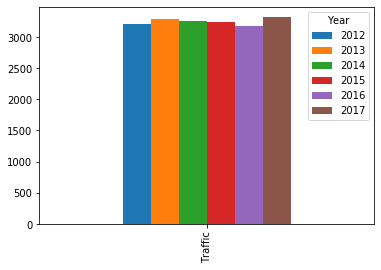

In [39]:
pd.pivot_table(data = data,columns = ['Year'],values = 'Traffic').plot(kind = 'bar')
plt.show()

ALMOST THE AVERAGE TRAFFIC IN EACH YEAR IS THE SAME , BUT WE HAVE TO CHECK THE VALUES STATISTICALLY BY DOING THE TEST OF MEAN FOR MORE THAN TWO SAMPLES, WHICH IS ANOVA-TEST.

In [40]:
one = data['Traffic'][data['Year'] == 2012]
two = data['Traffic'][data['Year'] == 2013]
three = data['Traffic'][data['Year'] == 2014]
four = data['Traffic'][data['Year'] == 2015]
five = data['Traffic'][data['Year'] == 2016]
six = data['Traffic'][data['Year'] == 2017]

CHECKING IF THE TRAFFIC VOLUME HAS ANY TYPE OF RELATIONSHIP WITH THE YEAR'S.

In [41]:
f_oneway(one,two,three,four,five,six)

F_onewayResult(statistic=4.639769140192883, pvalue=0.000310211353975309)

P_Value < 0.05 ,we reject the Null hypothesis

SPLITTING THE DATA INTO X AND Y WITH SPLIT SIZE 0.8/0.2

In [42]:
X = data.drop('Traffic',axis = 1)
y = data['Traffic']

In [43]:
X = pd.get_dummies(data = X,columns = ['Weather Type'],drop_first = True)
X.head()

,Wind Speed,Visibility (miles),Temperature,Year,Month,Day,Hour,Weather Type_Clouds,Weather Type_Drizzle,Weather Type_Fog,Weather Type_Haze,Weather Type_Mist,Weather Type_Rain,Weather Type_Smoke,Weather Type_Snow,Weather Type_Squall,Weather Type_Thunderstorm
0,2,1,288.28,2012,2,10,9,1,0,0,0,0,0,0,0,0,0
1,3,1,289.36,2012,2,10,10,1,0,0,0,0,0,0,0,0,0
2,3,2,289.58,2012,2,10,11,1,0,0,0,0,0,0,0,0,0
3,3,5,290.13,2012,2,10,12,1,0,0,0,0,0,0,0,0,0
4,3,7,291.14,2012,2,10,13,1,0,0,0,0,0,0,0,0,0


In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

# ASSUMPTIONS OF LINEAR REGRESSION.

# LINEARITY OF VARIABLES.

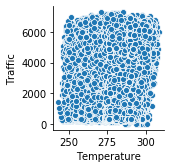

In [45]:
sns.pairplot(x_vars=['Temperature'],y_vars =['Traffic'],data = data)
plt.show()

CLEARLY THERE IS NO LINEAR RELATIONSHIP WITH IN THE VARIABLES.

# MEAN OF RESIDUALS.

In [46]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
residuals = y_pred-y_test
mean_of_residuals = np.mean(residuals)
print(f"The mean of the residuals is {mean_of_residuals}")

The mean of the residuals is 13.982384061942932


CLEARLY THE MEAN OF THE RESIDUALS IS NOT ZERO.

# HOMOSCEDASTICITY.

In [47]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals,X_test)
lzip(name, test)

[('F statistic', 0.9849381524417482), ('p-value', 0.6696702281436132)]

- H0: Error terms are homoscedastic
- Ha: Error terms are not homoscedastic
    
p-value > 0.05 fail to reject null hypothesis, error terms are homoscedastic

IT PASSES THE HOMO SCEDASTICITY TEST.

# TEST OF NORMALITY OF THE RESIDUALS.

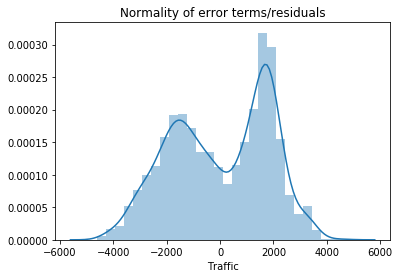

In [48]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

THE DISTRIBUTION CLEARLY SHOW'S THAT THE RESIDUALS ARE NOT NORMALLY DISTRIBUTED,AND THE THIRD ASSUMPTION FAIL'S.

# AUTO-CORELATION

In [49]:
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.20503329211969662

- Ho: Auto correlation is absent
- Ha: Auto correlation is present

The P-value is >0.05 ,we fail to reject the null hypothesis, auto co relation is absent.

# MULTI-COLINEARITY

In [50]:
vif = pd.DataFrame()
num = X.astype('float','int')
vif["VIF Factor"] = [variance_inflation_factor(num.values, i) for i in range(num.shape[1])]
vif["features"] = num.columns
vif

,VIF Factor,features
0,3.738344,Wind Speed
1,4.772446,Visibility (miles)
2,577.224608,Temperature
3,584.998205,Year
4,4.514635,Month
5,4.152527,Day
6,3.804237,Hour
7,2.229979,Weather Type_Clouds
8,1.132619,Weather Type_Drizzle
9,1.067172,Weather Type_Fog


CLEARLY WHEN THE VIF VALUE IS > 5 WE CAN SAY THAT THERE IS MULTI COLINEARITY BETWEEN 2 VARIABLES,WE WILL REMOVE THE TEMPERATURE COLUMN AS IT MIGHT BE DEPENDENT ON THE CLOUDS_ALL COLUMN.

# FURTHUR MODELLING.

In [51]:
test_scores = []
train_scores = []
rmse_values = []
r2 = []

In [52]:
X_sm = X
X_sm = sm.add_constant(X_sm)
lm = sm.OLS(y,X_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Traffic   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     321.6
Date:                Thu, 12 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:42:57   Log-Likelihood:            -3.0071e+05
No. Observations:               33638   AIC:                         6.015e+05
Df Residuals:                   33620   BIC:                         6.016e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2.079e+04   1.33e+04      1.560      0.119   -5328.911    4.69e+04
Wind Speed                   18.9703      4.945      3.837      0.000       9.279      28.662
Visibility (miles)            1.5456      3.919      0.394      0.693      -6.135       9.226
Temperature                  17.5817      0.866     20.299      0.000      15.884      19.279
Year                        -11.7162      6.625     -1.769      0.077     -24.701       1.269
Month                       -16.6235      2.933     -5.668      0.000     -22.372     -10.875
Day                          -5.0376      1.148     -4.387      0.000      -7.288      -2.787
Hour                         94.4594      1.470     64.241      0.000      91.577      97.341
Weather Type_Clouds         361.4851     26.239     13.777      0.000     310.056     412.914
Weather Type_Drizzle        106.3379     56.696      1.876      0.061      -4.788     217.464
Weather Type_Fog             33.3539     80.323      0.415      0.678    -124.082     190.790
Weather Type_Haze           588.0139     64.766      9.079      0.000     461.070     714.958
Weather Type_Mist            69.1900     35.085      1.972      0.049       0.422     137.958
Weather Type_Rain           107.1264     35.406      3.026      0.002      37.729     176.524
Weather Type_Smoke         -241.3227    448.480     -0.538      0.591   -1120.360     637.714
Weather Type_Snow           200.7275     46.554      4.312      0.000     109.479     291.976
Weather Type_Squall       -1049.3095    923.573     -1.136      0.256   -2859.544     760.925
Weather Type_Thunderstorm  -400.5900     81.580     -4.910      0.000    -560.489    -240.691
==============================================================================
Omnibus:                    15369.200   Durbin-Watson:                   0.248
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1935.343
Skew:                           0.187   Prob(JB):                         0.00
Kurtosis:                       1.886   Cond. No.                     2.69e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# LINEAR REGRESSION

In [53]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
train_scores.append(lr.score(X_train,y_train))
test_scores.append(lr.score(X_test,y_test))
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
r2.append(r2_score(y_test,y_pred))
rmse_values.append(np.sqrt(mean_squared_error(y_test,y_pred)))

0.14127451422116177
0.1335825233713036


# DECISION TREE REGRESSOR

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 209)
params = {'max_depth':[1,2,3,4,5],'max_features':['log2','sqrt','auto']}
Model = GridSearchCV(dtr,param_grid=params)
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)
train_scores.append(Model.score(X_train,y_train))
test_scores.append(Model.score(X_test,y_test))
print(Model.score(X_train,y_train))
print(Model.score(X_test,y_test))
r2.append(r2_score(y_test,y_pred))
rmse_values.append(np.sqrt(mean_squared_error(y_test,y_pred)))

0.7688289819767794
0.7757256359508802


# EXTRA TREE REGRESSOR

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 119)
params = {'max_depth':[1,2,3,4,5],'max_features':['log2','sqrt','auto']}
Model = GridSearchCV(etr,param_grid=params)
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)
r2.append(r2_score(y_test,y_pred))
rmse_values.append(np.sqrt(mean_squared_error(y_test,y_pred)))
train_scores.append(Model.score(X_train,y_train))
test_scores.append(Model.score(X_test,y_test))
print(Model.score(X_train,y_train))
print(Model.score(X_test,y_test))

0.6610198645090899
0.6715122637849555


# ENSEMBLE TECHNIQUES

# ADA BOOST REGRESSOR

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 6)
params = {'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.5,1],'loss':['linear','square','exponential']}
Model = GridSearchCV(abr,param_grid=params)
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)
r2.append(r2_score(y_test,y_pred))
rmse_values.append(np.sqrt(mean_squared_error(y_test,y_pred)))
train_scores.append(Model.score(X_train,y_train))
test_scores.append(Model.score(X_test,y_test))
print(Model.score(X_train,y_train))
print(Model.score(X_test,y_test))

0.7517789553722614
0.7520748075877746


# ADA BOOST REGRESSOR WITH EXTRA TREE

In [57]:
params = {'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.5,1]}
etr2 = ExtraTreeRegressor(max_depth = 5)
abr2 = AdaBoostRegressor(etr2)
Model = GridSearchCV(abr2,param_grid=params)
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)
r2.append(r2_score(y_test,y_pred))
rmse_values.append(np.sqrt(mean_squared_error(y_test,y_pred)))
train_scores.append(Model.score(X_train,y_train))
test_scores.append(Model.score(X_test,y_test))
print(Model.score(X_train,y_train))
print(Model.score(X_test,y_test))

0.7659347229052361
0.7651981598351507


# GRADIENT BOOSTING REGRESSOR

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 230)
params = {'n_estimators':[100,150,200,250]}
Model = GridSearchCV(gbr,param_grid=params)
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)
r2.append(r2_score(y_test,y_pred))
rmse_values.append(np.sqrt(mean_squared_error(y_test,y_pred)))
train_scores.append(Model.score(X_train,y_train))
test_scores.append(Model.score(X_test,y_test))
print(Model.score(X_train,y_train))
print(Model.score(X_test,y_test))

0.8008047908993233
0.7899536279763616


In [59]:
Model.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# EXTRA TREES REGRESSOR

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 91)
params = {'n_estimators':[50,100,150,200],'max_depth':[1,2,3,4],'max_features':['auto','sqrt','log2']}
Model = GridSearchCV(eetr,param_grid=params)
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)
r2.append(r2_score(y_test,y_pred))
rmse_values.append(np.sqrt(mean_squared_error(y_test,y_pred)))
train_scores.append(Model.score(X_train,y_train))
test_scores.append(Model.score(X_test,y_test))
print(Model.score(X_train,y_train))
print(Model.score(X_test,y_test))

0.703192401981283
0.7066757157659795


# BAGGING REGRESSOR

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 243)
params = {'n_estimators':[50,100,150,200]}
Model = GridSearchCV(br,param_grid=params)
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)
r2.append(r2_score(y_test,y_pred))
rmse_values.append(np.sqrt(mean_squared_error(y_test,y_pred)))
train_scores.append(Model.score(X_train,y_train))
test_scores.append(Model.score(X_test,y_test))
print(Model.score(X_train,y_train))
print(Model.score(X_test,y_test))

0.9763331566256815
0.8112843059055146


# BAGGING REGRESSOR WITH GRADIENT BOOST

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 243)
params = {'n_estimators':[50,100,150,200]}
br2  = BaggingRegressor(gbr)
Model = GridSearchCV(br2,param_grid=params)
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)
r2.append(r2_score(y_test,y_pred))
rmse_values.append(np.sqrt(mean_squared_error(y_test,y_pred)))
train_scores.append(Model.score(X_train,y_train))
test_scores.append(Model.score(X_test,y_test))
print(Model.score(X_train,y_train))
print(Model.score(X_test,y_test))

0.792617896490712
0.7761162599099803


# RANDOM FOREST REGRESSOR

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 40)
params = {'n_estimators':[50,100,150,200],'max_depth':[1,2,3,4]}
Model = GridSearchCV(rfr,param_grid=params)
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)
r2.append(r2_score(y_test,y_pred))
rmse_values.append(np.sqrt(mean_squared_error(y_test,y_pred)))
train_scores.append(Model.score(X_train,y_train))
test_scores.append(Model.score(X_test,y_test))
print(Model.score(X_train,y_train))
print(Model.score(X_test,y_test))

0.7675911190908973
0.7703929513609704


# XTREME GRADIENT DESCENT

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 40)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
r2.append(r2_score(y_test,y_pred))
rmse_values.append(np.sqrt(mean_squared_error(y_test,y_pred)))
train_scores.append(xg.score(X_train,y_train))
test_scores.append(xg.score(X_test,y_test))
print(xg.score(X_train,y_train))
print(xg.score(X_test,y_test))

0.8884456534575684
0.8314689843988083


In [73]:
ALL_SCORES = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Extra Tree','AdaBoost','AdaBoost-Extra Tree','Gradient Boost','Extra Trees','Bagging','Bagging-Gradient Boost','Random Forest','XG Boost'],'Training_Score':train_scores,'Testing_Score':test_scores,'RMSE':rmse_values})
ALL_SCORES

,Model,Training_Score,Testing_Score,RMSE
0,Linear Regression,0.141275,0.133583,1854.782828
1,Decision Tree,0.768829,0.775726,943.423028
2,Extra Tree,0.661020,0.671512,1144.913629
3,AdaBoost,0.751779,0.752075,993.014922
4,AdaBoost-Extra Tree,0.765935,0.765198,966.376128
5,Gradient Boost,0.800805,0.789954,913.942978
6,Extra Trees,0.703192,0.706676,1077.280823
7,Bagging,0.976333,0.811284,863.048544
8,Bagging-Gradient Boost,0.792618,0.776116,940.031683
9,Random Forest,0.767591,0.770393,954.595999


* OUR FINAL MODEL IS XGBOOST WITH THE LEAST RMSE VALUE.

# PREDICTING THE TEST VALUES:

In [74]:
def prediction(test_values,Y_TEST):
    from xgboost import XGBRegressor
    xg = XGBRegressor()
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    test_values.drop(['Dew Point','Snow_p_h','Rain_p_h','Air Pollution Index','Humidity','Clouds_all','Wind Speed','Wind Direction','Weather Description'],axis = 1,inplace = True)
    test_values['Date and Time'] = pd.to_datetime(test_values['Date and Time'])
    test_values['Year'] = test_values['Date and Time'].dt.year
    test_values['Month'] = test_values['Date and Time'].dt.month
    test_values['Day'] = test_values['Date and Time'].dt.day
    test_values['Hour'] = test_values['Date and Time'].dt.hour
    test_values.drop('Date and Time',axis = 1,inplace = True)
    test_values = pd.get_dummies(data = test_values,columns = ['Weather Type'],drop_first = True)
    final_model = XGBRegressor()
    final_model.fit(X,y)  
    #Please run all the cells before the "FURTHUR MODELLING HEADING"
    #Here the X and y are the preprocessing data points of our training data.
    final_results = final_model.predict(test_values)
    RMSE = np.sqrt(mean_squared_error(Y_TEST,final_results))
    print("The RMSE is: ".format(RMSE))
    print("The R2_score is: ".format(r2_score(Y_TEST,final_results)))